In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, plot_roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

ImportError: cannot import name 'plot_roc_curve' from 'sklearn.metrics' (C:\Users\Prakash R\anaconda3\Lib\site-packages\sklearn\metrics\__init__.py)

In [2]:
import pandas as pd


# Load the dataset
file_path = 'campaign_responses.csv'
data = pd.read_csv(file_path)


# Display the first few rows of the dataset
data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'campaign_responses.csv'

In [4]:
import pandas as pd


# Load the dataset
file_path = "C:\\A3\\campaign_responses.csv"
data = pd.read_csv(file_path)


# Display the first few rows of the dataset
data.head()

,customer_id,age,gender,annual_income,credit_score,employed,marital_status,no_of_children,responded
0,1,35,Male,65000,720,Yes,Married,2,Yes
1,2,28,Female,45000,680,No,Single,0,No
2,3,42,Male,85000,750,Yes,Married,3,Yes
3,4,31,Female,55000,710,Yes,Single,1,No
4,5,47,Male,95000,790,Yes,Married,2,Yes


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Load the dataset
data = pd.read_csv("C:\\A3\\campaign_responses.csv")

# Check the structure of the dataset
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     56 non-null     int64 
 1   age             56 non-null     int64 
 2   gender          56 non-null     object
 3   annual_income   56 non-null     int64 
 4   credit_score    56 non-null     int64 
 5   employed        56 non-null     object
 6   marital_status  56 non-null     object
 7   no_of_children  56 non-null     int64 
 8   responded       56 non-null     object
dtypes: int64(5), object(4)
memory usage: 4.1+ KB
None
       customer_id        age  annual_income  credit_score  no_of_children
count    56.000000  56.000000      56.000000     56.000000       56.000000
mean     28.500000  36.214286   69017.857143    719.107143        1.285714
std      16.309506   7.088311   22784.756524     60.340753        1.186504
min       1.000000  25.000000   35000.000000    600.000000 

In [6]:
#Identify categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Option 1: Label Encoding (for binary categorical data)
label_encoder = LabelEncoder()
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

# Assume 'response' is the target variable and the rest are predictors
target = 'responded'
predictors = [col for col in data.columns if col != target]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data[predictors], data[target], test_size=0.3, random_state=42)


# Fit the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


# Predict on the test set
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Print the model coefficients
coef_df = pd.DataFrame({'Variable': X_train.columns, 'Coefficient': model.coef_[0]})
print(coef_df)

         Variable  Coefficient
0     customer_id    -0.008536
1             age    -0.003609
2          gender     0.000250
3   annual_income     0.001264
4    credit_score    -0.121521
5        employed     0.000009
6  marital_status    -0.000474
7  no_of_children     0.000541


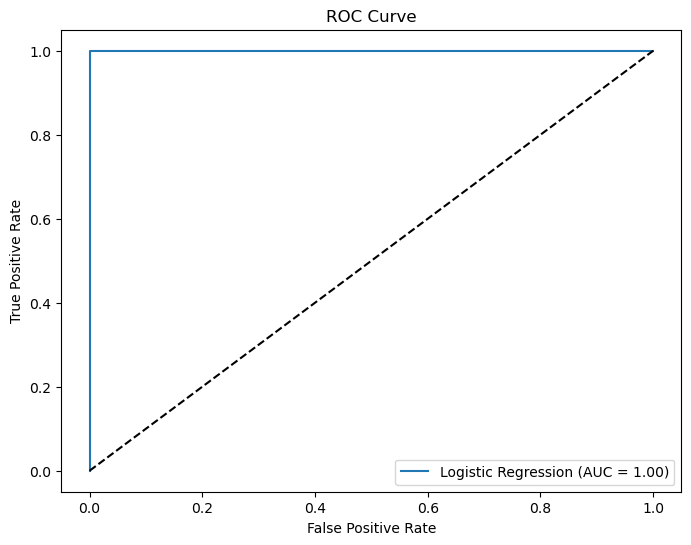

In [7]:
# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

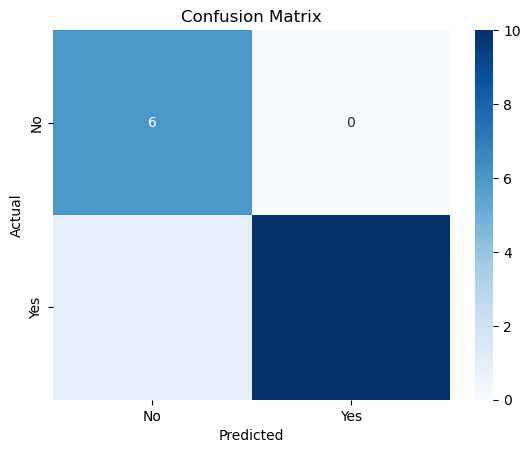

In [8]:
# Display the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

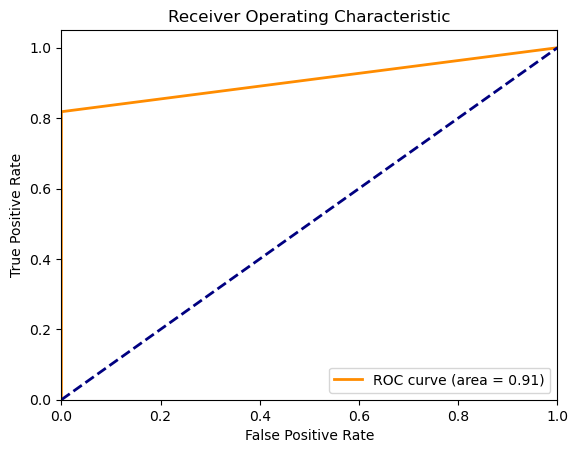

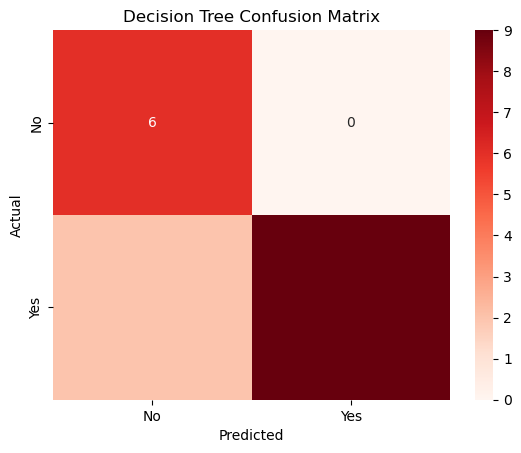

In [9]:
from sklearn.tree import DecisionTreeClassifier

# Fit the decision tree model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Predict on the test set
y_pred_tree = tree_model.predict(X_test)
y_prob_tree = tree_model.predict_proba(X_test)[:, 1]

# Evaluate the model
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
roc_auc_tree = roc_auc_score(y_test, y_prob_tree)

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming y_test and y_scores are your ground truth labels and predicted scores
fpr, tpr, thresholds = roc_curve(y_test, y_pred_tree)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# Display the confusion matrix
sns.heatmap(conf_matrix_tree, annot=True, fmt='d', cmap='Reds', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()


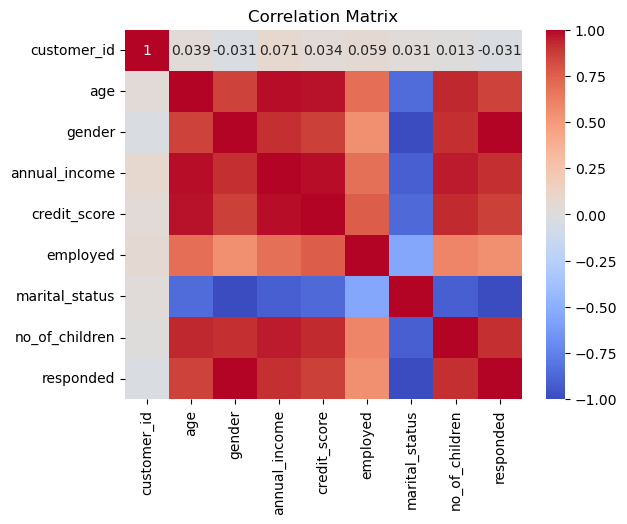

In [10]:
# Check for multicollinearity
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [11]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import Probit


# Load the dataset
file_path = "C:\\A1\\NSSO68.csv.crdownload" 
data = pd.read_csv(file_path, low_memory=False)


# Display the first few rows of the dataset to understand its structure
print(data.head())


# Assuming the dataset has a column 'NonVegetarian' which is the target variable
# and other relevant columns are used as features

   slno       grp  Round_Centre  FSU_number  Round  Schedule_Number  Sample  \
0     1  4.10E+31             1       41000     68               10       1   
1     2  4.10E+31             1       41000     68               10       1   
2     3  4.10E+31             1       41000     68               10       1   
3     4  4.10E+31             1       41000     68               10       1   
4     5  4.10E+31             1       41000     68               10       1   

   Sector  state  State_Region  ...  pickle_v  sauce_jam_v  Othrprocessed_v  \
0       2     24           242  ...       0.0          0.0              0.0   
1       2     24           242  ...       0.0          0.0              0.0   
2       2     24           242  ...       0.0          0.0              0.0   
3       2     24           242  ...       0.0          0.0              0.0   
4       2     24           242  ...       0.0          0.0              0.0   

   Beveragestotal_v  foodtotal_v  foodtotal_q  sta

In [16]:
# Subset data for state 'RJ'
subset_data = data[['chicken_q', 'Age', 'Marital_Status', 'Education']]

# Check for missing values
print(subset_data['chicken_q'].isna().sum())
print(subset_data['Age'].isna().sum())
print(subset_data['Marital_Status'].isna().sum())
print(subset_data['Education'].isna().sum())

0
0
1
3


In [17]:
# Function to impute missing values with mean
def impute_with_mean(df, columns):
    for col in columns:
        df[col].fillna(df[col].mean(), inplace=True)
    return df

# Columns to impute
columns_to_impute = ['Education', 'chicken_q', 'Age', 'Marital_Status']

# Impute missing values with mean in the subset data
subset_data = impute_with_mean(subset_data, columns_to_impute)

# Ensure no infinite values
subset_data = subset_data.replace([np.inf, -np.inf], np.nan)

# Drop rows with any remaining NaN values
subset_data.dropna(inplace=True)

C:\Users\Prakash R\AppData\Local\Temp\ipykernel_16112\3479516528.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(df[col].mean(), inplace=True)


In [18]:
# Check for missing values
print(subset_data['chicken_q'].isna().sum())
print(subset_data['Age'].isna().sum())
print(subset_data['Marital_Status'].isna().sum())
print(subset_data['Education'].isna().sum())

0
0
0
0


In [19]:
import warnings
from statsmodels.tools.sm_exceptions import PerfectSeparationWarning
from statsmodels.tools.sm_exceptions import ConvergenceWarning

# Suppress PerfectSeparationWarning
warnings.filterwarnings('ignore', category=PerfectSeparationWarning)

# Suppress ConvergenceWarning
warnings.filterwarnings('ignore', category=ConvergenceWarning)

# Convert the target variable to binary based on the specified condition
subset_data['chicken_q'] = subset_data['chicken_q'].apply(lambda x: 0 if x < 1 else 1)

# Define the independent variables (example columns, update based on your dataset)
# Assuming 'Age', 'Income', 'Education' are some of the features in the dataset
independent_vars = ['Age', 'Marital_Status', 'Education']


# Add a constant term for the intercept
X = sm.add_constant(subset_data[independent_vars])


# Define the dependent variable
y = subset_data['chicken_q']


# Fit the probit regression model
probit_model = Probit(y, X).fit()


# Print the summary of the model
print(probit_model.summary())


# Make predictions
subset_data['predicted'] = probit_model.predict(X)


# Display the first few rows with the predictions
print(data.head())

Optimization terminated successfully.
         Current function value: 0.144641
         Iterations 7
                          Probit Regression Results                           
Dep. Variable:              chicken_q   No. Observations:                22797
Model:                         Probit   Df Residuals:                    22793
Method:                           MLE   Df Model:                            3
Date:                Thu, 04 Jul 2024   Pseudo R-squ.:                0.007380
Time:                        23:04:25   Log-Likelihood:                -3297.4
converged:                       True   LL-Null:                       -3321.9
Covariance Type:            nonrobust   LLR p-value:                 1.284e-10
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.9586      0.097    -20.247      0.000      -2.148      -1.769
Age              

In [20]:
# Load the data
data = pd.read_csv("C:\\A1\\NSSO68.csv.crdownload", low_memory=False)

# Subset data for state 'RJ'
df = data[['MPCE_URP','Whether_owns_any_land', 'hhdsz', 'Religion','Social_Group','Regular_salary_earner']]

# Check for missing values
print(df['MPCE_URP'].isna().sum())
print(df['Whether_owns_any_land'].isna().sum())
print(df['hhdsz'].isna().sum())
print(df['Religion'].isna().sum())
print(df['Social_Group'].isna().sum())
print(df['Regular_salary_earner'].isna().sum())

0
3
0
0
4
5


In [21]:
# Columns to impute
columns_to_impute = ['Whether_owns_any_land','Religion','Social_Group','Regular_salary_earner']

In [22]:
# Drop rows with any remaining NaN values
df.dropna(inplace=True)

C:\Users\Prakash R\AppData\Local\Temp\ipykernel_16112\1461368480.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [23]:
# Check for missing values
print(df['MPCE_URP'].isna().sum())
print(df['Whether_owns_any_land'].isna().sum())
print(df['hhdsz'].isna().sum())
print(df['Religion'].isna().sum())
print(df['Social_Group'].isna().sum())
print(df['Regular_salary_earner'].isna().sum())

0
0
0
0
0
0


In [24]:
# Convert the target variable to binary based on the specified condition
df['MPCE_URP'] = df['MPCE_URP'].apply(lambda x: 0 if x < 380 else 1)

C:\Users\Prakash R\AppData\Local\Temp\ipykernel_16112\2092469563.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MPCE_URP'] = df['MPCE_URP'].apply(lambda x: 0 if x < 380 else 1)


In [25]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.base.model import GenericLikelihoodModel

# Define the independent variables (X) and the dependent variable (y)
X = df[['Whether_owns_any_land', 'hhdsz', 'Religion','Social_Group','Regular_salary_earner']]  # replace with your actual column names
y = df['MPCE_URP']  # replace with your actual column name

# Add a constant term for the intercept
X = sm.add_constant(X)

# Define the Tobit model class
class Tobit(GenericLikelihoodModel):
    def __init__(self, endog, exog, left=0, right=np.inf, **kwargs):
        super(Tobit, self).__init__(endog, exog, **kwargs)
        self.left, self.right = left, right
    
    def nloglikeobs(self, params):
        exog = self.exog
        endog = self.endog
        left, right = self.left, self.right
        
        beta = params[:-1]
        sigma = params[-1]
        
        XB = np.dot(exog, beta)
        cens = (endog == left) * (left != -np.inf) + (endog == right) * (right != np.inf)
        uncens = 1 - cens
        
        ll = np.zeros(len(endog))
        
        ll[cens] = np.log(
            (1 / (np.sqrt(2 * np.pi) * sigma)) *
            np.exp(-((endog[cens] - XB[cens]) ** 2) / (2 * sigma ** 2))
        )
        
        ll[uncens] = np.log(
            (1 / (np.sqrt(2 * np.pi) * sigma)) *
            np.exp(-((endog[uncens] - XB[uncens]) ** 2) / (2 * sigma ** 2))
        )
        
        return -ll

    def fit(self, start_params=None, maxiter=10000, maxfun=5000, **kwargs):
        if start_params is None:
            start_params = np.append(np.zeros(self.exog.shape[1]), 1)
        return super(Tobit, self).fit(start_params=start_params,
                                     maxiter=maxiter, maxfun=maxfun, **kwargs)

# Fit the Tobit model
tobit_model = Tobit(y, X)
tobit_results = tobit_model.fit()

# Print the summary of the model
print(tobit_results.summary())

Optimization terminated successfully.
         Current function value: -0.000071
         Iterations: 647
         Function evaluations: 997
                                Tobit Results                                 
Dep. Variable:               MPCE_URP   Log-Likelihood:                 1.6078
Model:                          Tobit   AIC:                             10.78
Method:            Maximum Likelihood   BIC:                             67.02
Date:                Thu, 04 Jul 2024                                         
Time:                        23:09:58                                         
No. Observations:               22785                                         
Df Residuals:                   22779                                         
Df Model:                           5                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------

C:\Users\Prakash R\anaconda3\Lib\site-packages\statsmodels\base\model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Prakash R\anaconda3\Lib\site-packages\statsmodels\base\model.py:2742: UserWarning: df_model + k_constant + k_extra differs from k_params
  warnings.warn("df_model + k_constant + k_extra "
C:\Users\Prakash R\anaconda3\Lib\site-packages\statsmodels\base\model.py:2746: UserWarning: df_resid differs from nobs - k_params
  warnings.warn("df_resid differs from nobs - k_params")
